In [12]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

Reading the dataset

In [13]:
csv = pd.read_csv("../input/chinese-mnist/chinese_mnist.csv")
print(csv)

       suite_id  sample_id  code  value character
0             1          1    10      9         九
1             1         10    10      9         九
2             1          2    10      9         九
3             1          3    10      9         九
4             1          4    10      9         九
...         ...        ...   ...    ...       ...
14995        99          5     9      8         八
14996        99          6     9      8         八
14997        99          7     9      8         八
14998        99          8     9      8         八
14999        99          9     9      8         八

[15000 rows x 5 columns]


Data Preprocessing


In [33]:
X = []
y = []
for row in csv.itertuples():
    suite_id = row[1]
    sample_id = row[2]
    code = row[3]
    file_name = f"input_{suite_id}_{sample_id}_{code}.jpg"
    x = cv2.imread(f"../input/chinese-mnist/data/data/{file_name}")
    X.append(x)
    one_hot = [0] * 15
    one_hot[code - 1] = 1
    y.append(one_hot)
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [34]:
print(X_train.shape)
print(y_train.shape)

(12000, 64, 64, 3)
(12000, 15)


Normalizing to greyscale

In [35]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

Neural Network model

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [55]:
image_width = 64
image_height = 64

model = Sequential()

# Convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dense(15, activation='softmax'))

In [56]:
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ['accuracy']
)

Training data


In [57]:
model.fit(X_train_scaled,y_train,epochs = 5) 

Epoch 1/5
375/375 [==============================] - 50s 130ms/step - loss: 0.8851 - accuracy: 0.7235
Epoch 2/5
375/375 [==============================] - 49s 130ms/step - loss: 0.2443 - accuracy: 0.9205
Epoch 3/5
375/375 [==============================] - 49s 131ms/step - loss: 0.1342 - accuracy: 0.9598
Epoch 4/5
375/375 [==============================] - 49s 131ms/step - loss: 0.0918 - accuracy: 0.9714
Epoch 5/5
375/375 [==============================] - 49s 130ms/step - loss: 0.0611 - accuracy: 0.9798


Model evaluation

In [62]:
prediction_base = model.predict(X_test)
binary_base = tf.keras.metrics.categorical_accuracy(y_test, prediction_base)
print(f"The accuracy presented by the model is: {np.sum(binary_base)/y_test.shape[0]}")

94/94 [==============================] - 3s 31ms/step
The accuracy presented by the model is: 0.896


Testing model

1/1 [==============================] - 0s 62ms/step
Prediction: 3


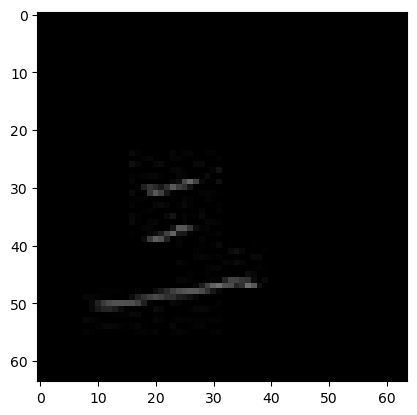

In [63]:
sample = cv2.imread("../input/chinese-mnist/data/data/input_100_10_4.jpg")
plt.imshow(sample)
sample = np.array([sample])
sample_prediction = np.argmax(model.predict([sample]))
print(f"Prediction: {sample_prediction}")